<a href="https://colab.research.google.com/github/iBranBran/Stock-Prediction/blob/main/LSTM_APPLStockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of Apple Stock (AAPL)

In [23]:
#import libraries
import numpy as np
import pandas as pd
import math
import pandas_datareader.data as web
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import yfinance as yf


In [24]:
#Get Stock Quote of Apple (AAPL)
start_date = '2023-01-01'
end_date = '2023-12-20'

appleData = yf.download('AAPL', start=start_date, end=end_date)
appleData

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.374802,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.657639,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.325081,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.899521,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.426575,70790800
...,...,...,...,...,...,...
2023-12-13,195.089996,198.000000,194.850006,197.960007,197.960007,70404200
2023-12-14,198.020004,199.619995,196.160004,198.110001,198.110001,66831600
2023-12-15,197.529999,198.399994,197.000000,197.570007,197.570007,128256700


In [25]:
appleData.describe()

,Open,High,Low,Close,Adj Close,Volume
count,243.000000,243.000000,243.000000,243.000000,243.000000,2.430000e+02
mean,171.612552,173.241811,170.351235,171.941688,171.501471,5.973137e+07
std,17.357007,17.114439,17.380293,17.199738,17.362888,1.771544e+07
min,126.010002,127.769997,124.169998,125.019997,124.325081,2.404830e+07
25%,161.320000,162.099998,159.930000,160.785004,160.135422,4.837400e+07
50%,174.669998,176.389999,173.539993,175.050003,174.693649,5.575190e+07
75%,185.230003,187.020004,183.995003,185.139999,184.788368,6.596870e+07
max,198.020004,199.619995,197.000000,198.110001,198.110001,1.543573e+08


In [26]:
appleData.shape

(243, 6)

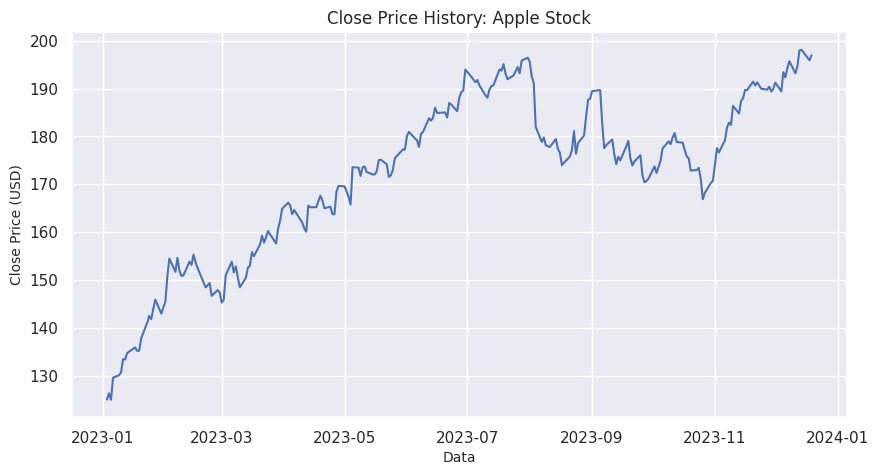

In [27]:
#Visualize closing price history
plt.figure(figsize=(10,5))
plt.title('Close Price History: Apple Stock')
plt.plot(appleData['Close'])
plt.xlabel('Data', fontsize = 10)
plt.ylabel('Close Price (USD)', fontsize=10)
plt.show()

In [28]:
closingData = appleData.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = closingData.values
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

195

In [29]:
#Scale Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data[:5])

[[0.00068413]
 [0.01833361]
 [0.        ]
 [0.06293608]
 [0.0701874 ]]


In [30]:
#Create Training Dataset
#Create Scale training dataset
train_data = scaled_data[0:training_data_len,:]
x_train =[]
y_train =[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.00068413, 0.01833361, 0.        , 0.06293608, 0.0701874 ,
       0.07812285, 0.11588464, 0.11479007, 0.13326033, 0.14940491,
       0.13941729, 0.14023816, 0.17581061, 0.2201396 , 0.23956767,
       0.23040092, 0.2591327 , 0.28608558, 0.24599812, 0.2636475 ,
       0.2792447 , 0.35298959, 0.40333837, 0.36543984, 0.40539055,
       0.3680394 , 0.35367351, 0.35558895, 0.39444531, 0.38555204,
       0.41469426, 0.39252987, 0.37665898, 0.32097411, 0.32685738,
       0.33356131, 0.29675754, 0.31331236, 0.30633474, 0.27760295,
       0.28581209, 0.35586265, 0.39417162, 0.36366135, 0.38103704,
       0.34984264, 0.32124781, 0.34820089, 0.37720616, 0.38267899,
       0.42180884, 0.41017925, 0.4430154 , 0.46873718, 0.44889866,
       0.46394848, 0.4820085 , 0.45505542, 0.44643584, 0.48912308])]
[0.5108770275070504]



In [31]:
#convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [32]:
#reshape the dataset from 2D to 3D
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(135, 60, 1)

In [33]:
#Build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape=(x_train.shape[1], 1) ))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [34]:
#Compile the LSTM Model
model.compile(optimizer='adam', loss='mean_squared_error')


In [35]:
#Train the model
hist = model.fit(x_train,y_train, batch_size = 7, epochs = 100)

Epoch 1/100
20/20 [==============================] - 5s 42ms/step - loss: 0.0580
Epoch 2/100
20/20 [==============================] - 1s 41ms/step - loss: 0.0065
Epoch 3/100
20/20 [==============================] - 1s 57ms/step - loss: 0.0048
Epoch 4/100
20/20 [==============================] - 1s 68ms/step - loss: 0.0047
Epoch 5/100
20/20 [==============================] - 1s 69ms/step - loss: 0.0050
Epoch 6/100
20/20 [==============================] - 1s 51ms/step - loss: 0.0055
Epoch 7/100
20/20 [==============================] - 1s 43ms/step - loss: 0.0041
Epoch 8/100
20/20 [==============================] - 1s 43ms/step - loss: 0.0049
Epoch 9/100
20/20 [==============================] - 1s 42ms/step - loss: 0.0043
Epoch 10/100
20/20 [==============================] - 1s 42ms/step - loss: 0.0043
Epoch 11/100
20/20 [==============================] - 1s 43ms/step - loss: 0.0042
Epoch 12/100
20/20 [==============================] - 1s 42ms/step - loss: 0.0061
Epoch 13/100
20/20 [=====

<function matplotlib.pyplot.show(close=None, block=None)>

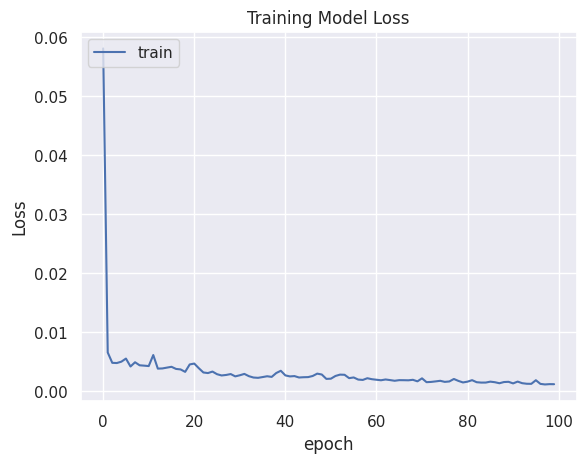

In [36]:
plt.plot(hist.history['loss'])
plt.title ('Training Model Loss')
plt.xlabel('epoch')
plt.ylabel('Loss')

plt.legend(['train'], loc = 'upper left')
plt.show

In [37]:
#create the testing dataset
#create new array constaining scaled values
test_data = scaled_data[training_data_len - 60: ,:]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range (60, len(test_data)):
  x_test.append(test_data[i-60: i, 0])

In [38]:
#Convert Data to numpy array
x_test = np.array(x_test)
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [39]:
#Get the predicted price values based on model
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


2/2 [==============================] - 1s 16ms/step


In [40]:
#Get Root mean squared error (RMSE)
rsme = np.sqrt(np.mean(predictions - y_test)**2)
rsme

1.4374971389770508

In [41]:
accuracy = np.mean((y_test - abs(predictions - y_test))/ y_test)
accuracy

0.9890967151952316

<ipython-input-42-f0ac3be39346>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


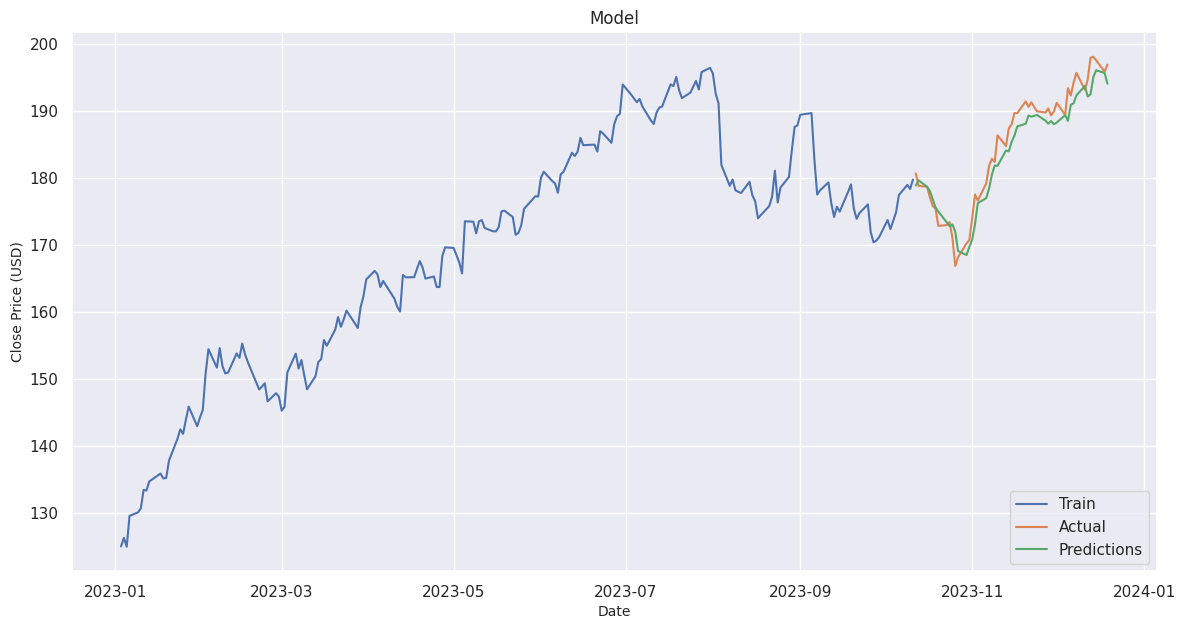

In [42]:
#Plot the Data
train = closingData[:training_data_len]
valid = closingData[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize = (14,7))
plt.title('Model')
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Close Price (USD)', fontsize = 10)

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()

In [43]:
valid

,Close,Predictions
Date,,
2023-10-12,180.710007,178.897903
2023-10-13,178.850006,179.669373
2023-10-16,178.720001,178.718384
2023-10-17,177.149994,178.066467
2023-10-18,175.839996,176.883713
2023-10-19,175.460007,175.636353
2023-10-20,172.880005,175.013046
2023-10-23,173.000000,173.396515
2023-10-24,173.440002,172.844925


In [44]:
#Predict closing price of AAPL stock date 2023-12-20, (I'm working on this on 2023-12-20, before the stock market opens)
start_date = '2021-01-01'
end_date = '2023-12-20'
apple_quote = yf.download('AAPL', start=start_date, end=end_date)

#create new dataframe
newdf = apple_quote.filter(['Close'])
#obtain the last 60 days closing price values and convert the dataframe to an array
last_60_days = newdf[-60:].values
#Scale the data to be values inbetween 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#append the past 60 days
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
#reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# predict the scaled price
predicted_price = model.predict (X_test)
#reverse the scaling
pred_price = scaler.inverse_transform(predicted_price)
print('The predicted price is:$', pred_price)

[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 27ms/step
The predicted price is:$ [[194.28862]]


**The Closing Price Ended At $194.68 USD**